In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Global API
Matplotlib's default pyplot API has a global, MATLAB-style interface, we've already seen:

In [3]:
x = np.arange(-10,11)

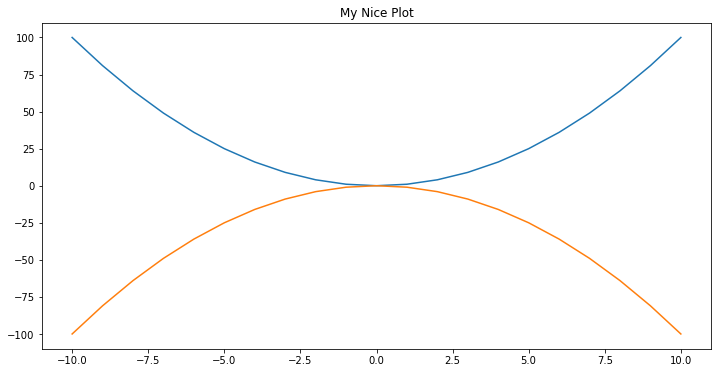

In [4]:
plt.figure(figsize=(12,6))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Text(0, 0.5, 'X Squared')

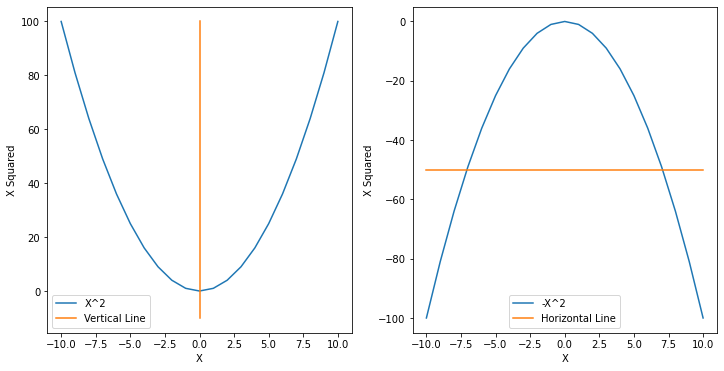

In [5]:
plt.figure(figsize=(12,6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1) #rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

### OOP Interface

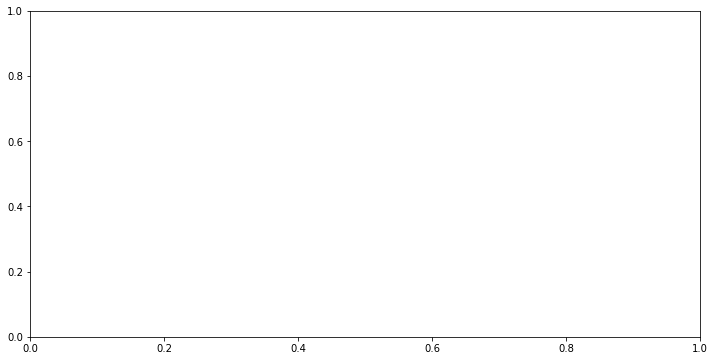

In [6]:
fig, axes = plt.subplots(figsize=(12,6))

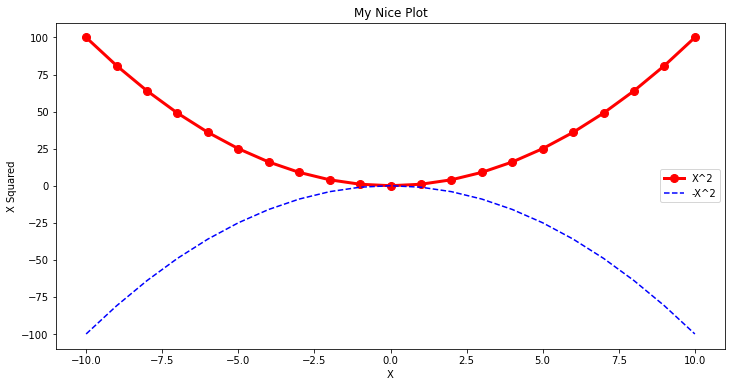

In [7]:
axes.plot(
   x, (x ** 2), color = 'red', linewidth=3,
   marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label = '-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()
fig

Text(0.5, 1.0, 'My Nice Plot')

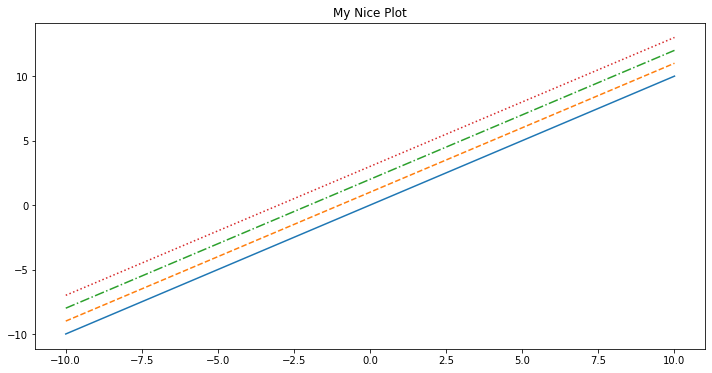

In [9]:
fig, axes = plt.subplots(figsize=(12,6))

axes.plot(x, x+0, linestyle='solid')
axes.plot(x, x+1, linestyle='dashed')
axes.plot(x, x+2, linestyle='dashdot')
axes.plot(x, x+3, linestyle='dotted')

axes.set_title("My Nice Plot")

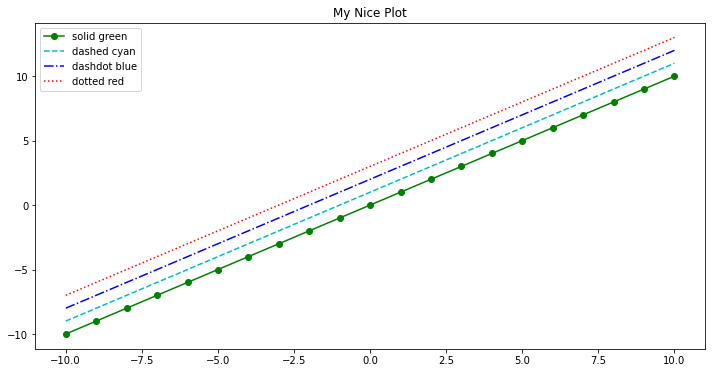

In [13]:
fig, axes = plt.subplots(figsize=(12,6))

axes.plot(x, x+0, '-og', label = "solid green")
axes.plot(x, x+1,'--c', label = "dashed cyan")
axes.plot(x, x+2, '-.b', label = "dashdot blue")
axes.plot(x, x+3, ':r', label = "dotted red")

axes.set_title("My Nice Plot")
axes.legend()

print('Markers: {}'.format([m for m in plt.Line2D.markers]))

In [16]:
linestyles = ['_','-','--',':']
print('Line styles: {}'.format(linestyles))

Line styles: ['_', '-', '--', ':']


### Other types of plots
#### Figures and subfigures

When we call the `subplots()` function we get a tuple containing a `Figure` and a `axes` element.

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

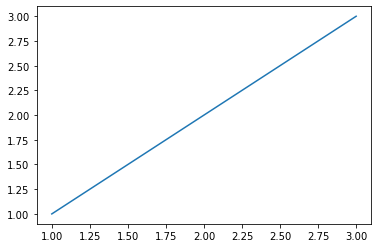

In [17]:
plot_objects = plt.subplots()

fig, ax = plot_objects
ax.plot([1,2,3],[1,2,3])
plot_objects

(<Figure size 1008x432 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

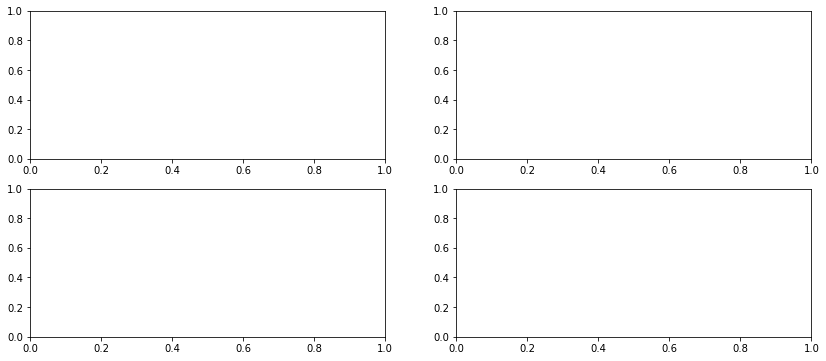

In [18]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14,6))
fig, ((ax1,ax2), (ax3,ax4)) = plot_objects
plot_objects

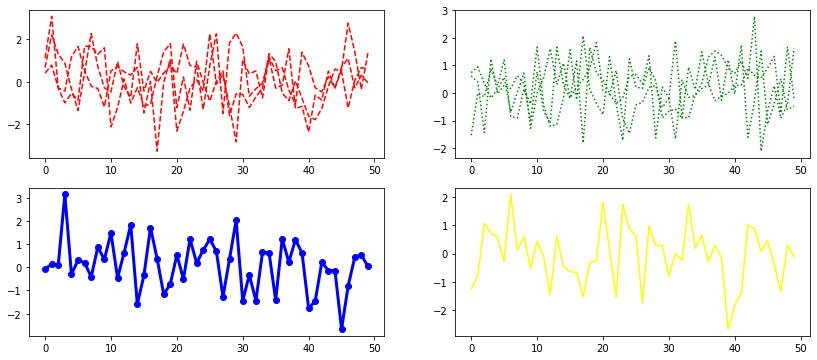

In [22]:
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o',linewidth=3.0)
ax4.plot(np.random.randn(50), c='yellow')

fig

The `subplot2grid` command


There is another way to make subplots using a grid-like format:

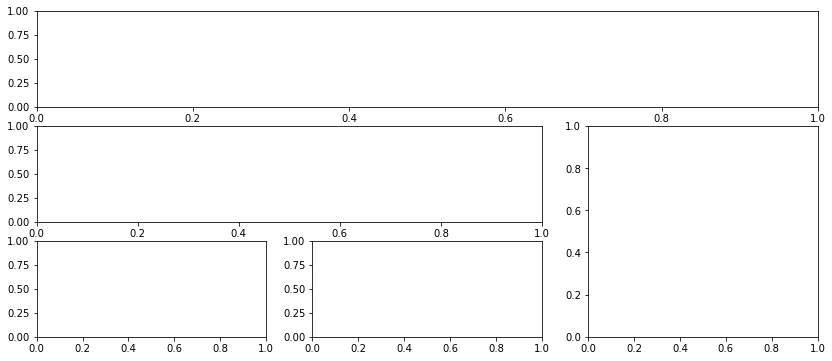

In [23]:
plt.figure(figsize=(14,6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))


### Scatter Plot

In [24]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N)) ** 2 #0 to 15 point radii

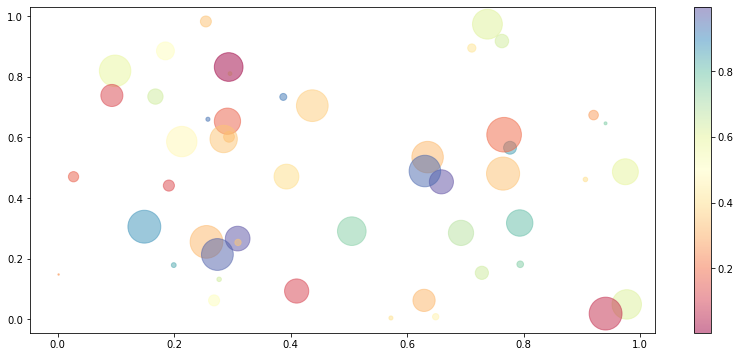

In [25]:
plt.figure(figsize=(14,6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

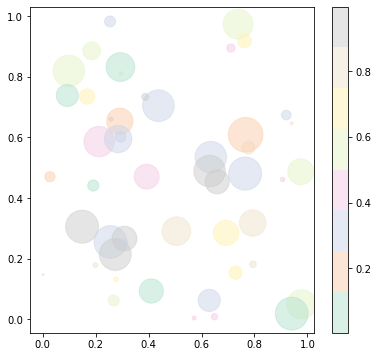

In [27]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

### Histograms

In [28]:
values = np.random.randn(1000)

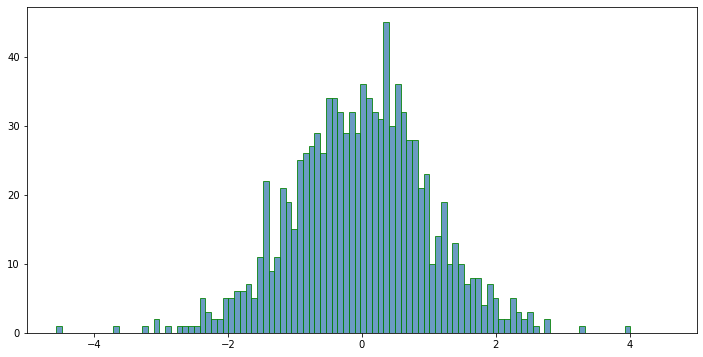

In [30]:
plt.subplots(figsize=(12,6))

plt.hist(values, bins=100, alpha=0.8,
        histtype='bar',color='steelblue',
        edgecolor='green')
plt.xlim(xmin=-5,xmax=5)
plt.show()

In [31]:
fig.savefig('hist.png')

### KDE (Kernel Density Estimation)

In [32]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

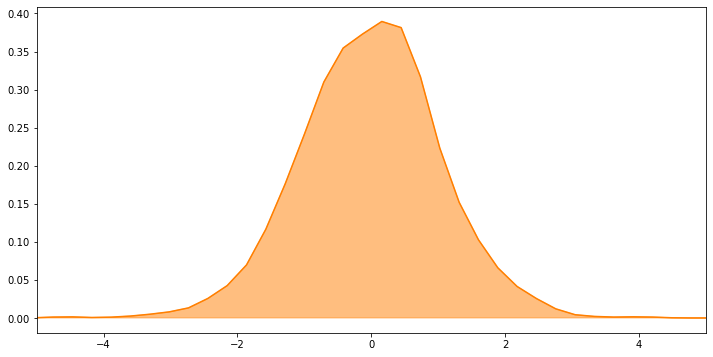

In [34]:
plt.subplots(figsize=(12,6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

### Combine plots

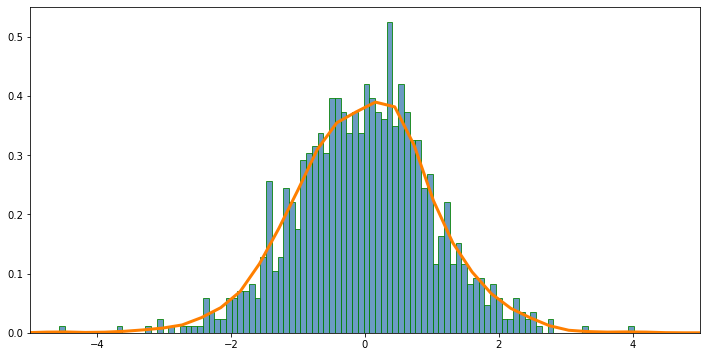

In [35]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8, density=1,
        histtype='bar', color='steelblue',
        edgecolor='green')
plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

### Bar plots

In [36]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]

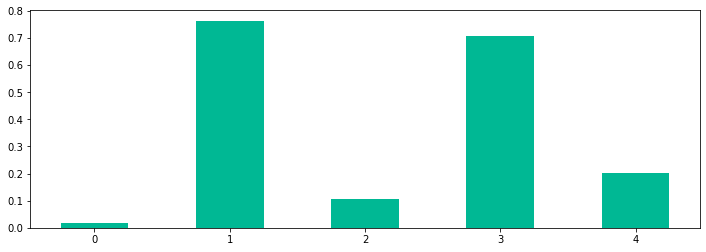

In [37]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

Also can be stacked bars, and add a legend to the plot:

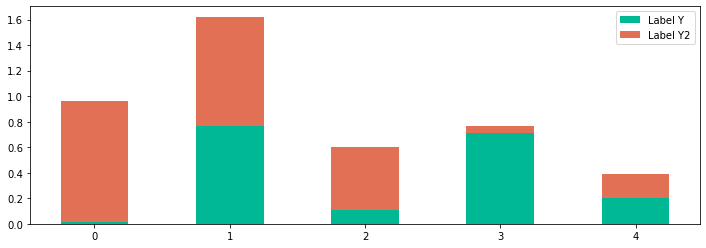

In [43]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894',label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=barWidth, color='#e17055',bottom=Y, label='Label Y2')

plt.legend()
plt.show()

### Boxplots and outlier detection

In [44]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])

(array([1., 1., 0., 0., 4., 6., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <BarContainer object of 10 artists>)

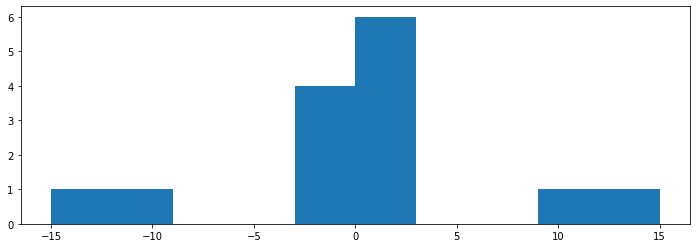

In [45]:
plt.figure(figsize=(12,4))

plt.hist(values)

{'whiskers': [<matplotlib.lines.Line2D at 0x1717f100>,
 'caps': [<matplotlib.lines.Line2D at 0x1717f340>,
 'boxes': [<matplotlib.lines.Line2D at 0x17170f70>],
 'medians': [<matplotlib.lines.Line2D at 0x1717f610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1717f778>],
 'means': []}

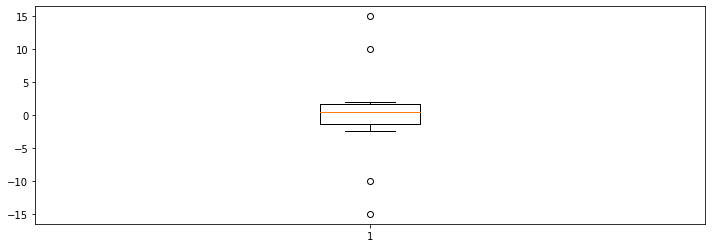

In [46]:
plt.figure(figsize=(12, 4))

plt.boxplot(values)